## Lecture-8: Classifiers
## Under the supervision of Dr. Manish Shrivastava

# Topics covered so far

* Lecture - 1: Python basics includes list, tuple, dictionary, loops and functions
* Lecture - 2: Additional concepts in python, Introduction to Numpy, pandas, and matplotlib
* Lecture - 3: Regular expressions, stop words, lemmatization, stemming, Tokenization and
Challenges in tokenization
* Lecture - 4: Spelling mistake detection and correction with minimum edit distance, Chunking
and NER, POS tagging
* Lecture - 5: Language Modeling, Smoothing
* Lecture - 6: Word Representations
* Lecture - 7: Introduction to Neural Networks, Activation functions, Training single layer perceptron model-linear regression


## Topics covered in this lecture
  <b>1. Logistic Regression</b>
  
  <b>2. Support Vector Machines</b>
  
  <b>3. Multi Layer Perceptron</b>
 





## Classifiers

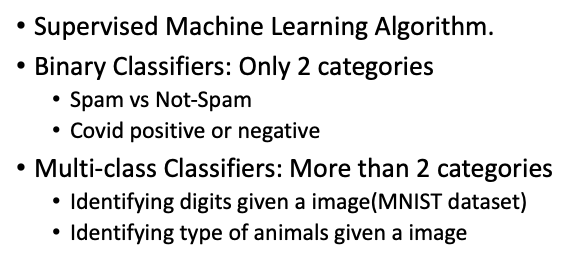

## Logistic Regression (LR)

- Logistic Regression is a linear classifier.

- The key assumption in LR is, the data should be linearly separable.
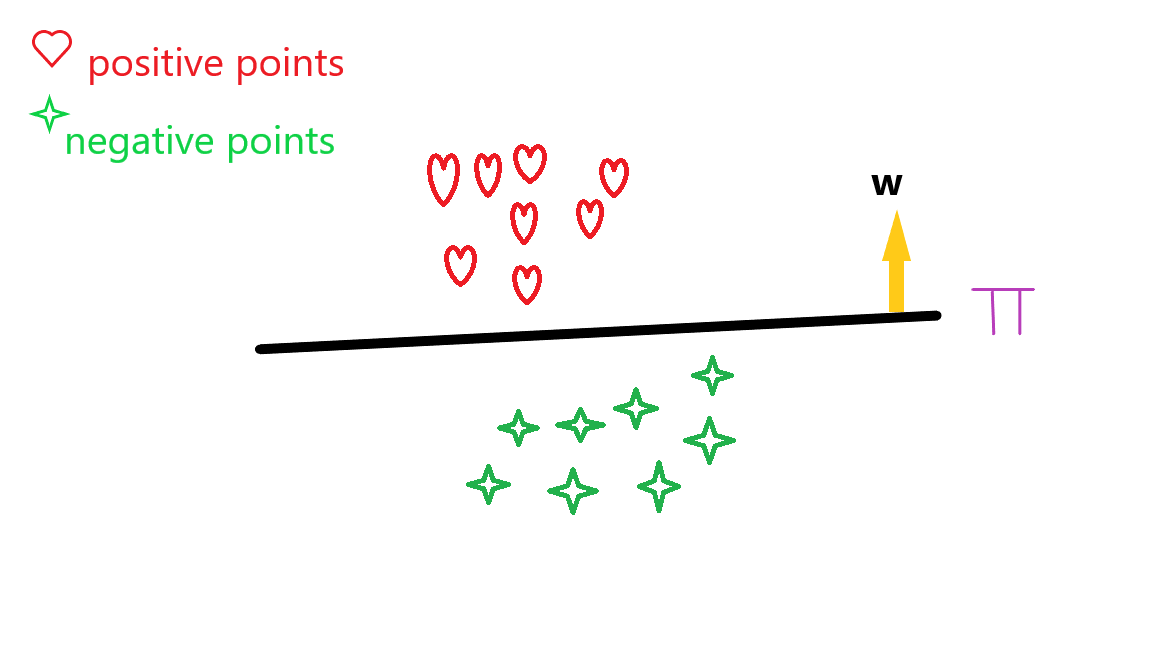

- In above image, we have the data points corresponding to positive and negative classes.

- For Positive data point xi, it's corresponding label yi= +1

- For Negative data point xi, it's corresponding label yi= -1


- The task is to build a classifier using logistic regression.

- Here, Our objective is to find a plane $\pi$ that separates positive points from the negative points.

- The equation of plane $\pi$ is $\boxed{w^T x +b=0}$. So, our objective is to find right w and b. where w is the unit vector perpendicular to plane $\pi$

- For all the points that are in the direction of w, $\boxed{w^T x >0}$

- For all the points that are  in the oppposite direction of w, $\boxed{w^T x <0}$

- We can define our classifier as follows,
   - given a data point xi, we compute $\boxed{w^T xi }$
   - if  $\boxed{w^T xi >0}$ then yi=+1
   - if $\boxed{w^T xi <0}$ then yi=-1

- From the above 2 equations we can write,
   - for correctly classified points, $\boxed{yi*w^T xi >0}$

- So, our goal is to maximize the number of correctly classified data points.

- That means we need to find W that maximizes the number of correctly classified data points.

- So, our optimization problem will be...

- $\boxed{W^* = argmax_{w}  \sum_{i=1}^n yi*w^T xi }$ Where, $W^*$ is the optimal W

- The problem with this approach is the effect of <b>outliers</b>.

- 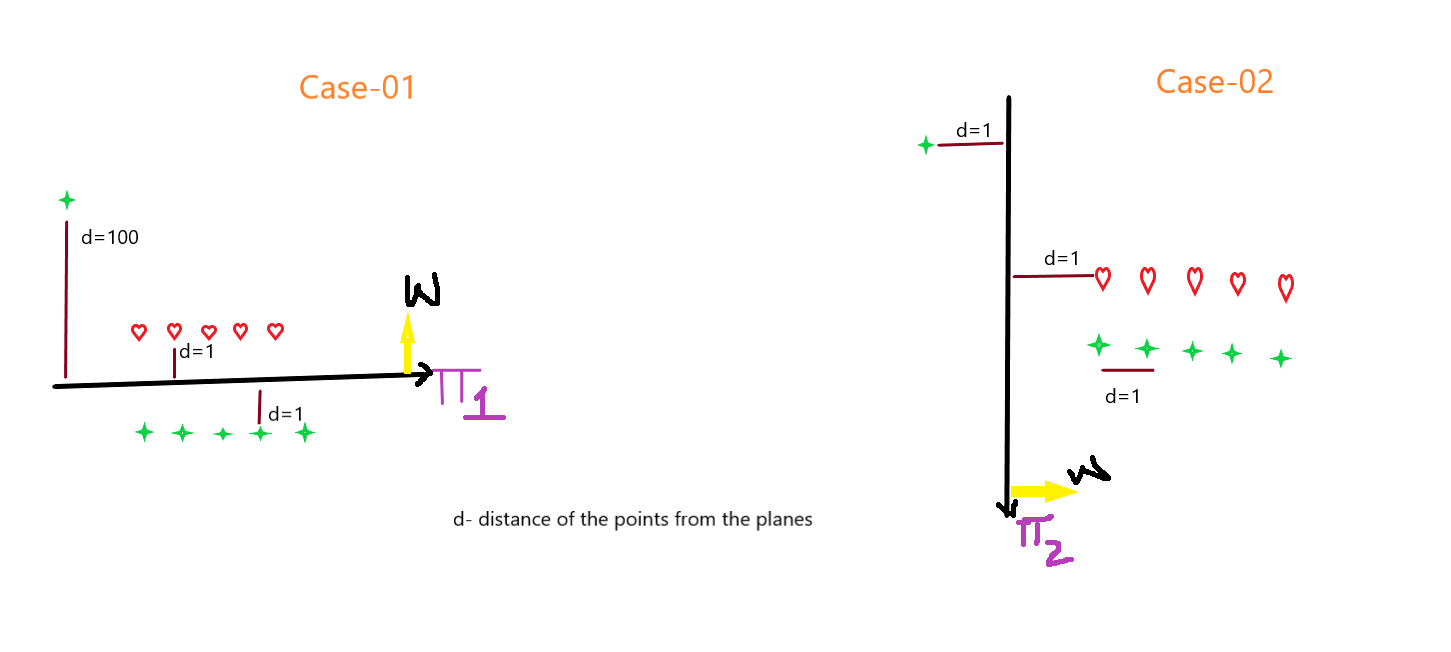

   - In case 1,  $\boxed{\sum yi*w^T xi}$= 1+1+1+1+1+1+1+1+1+1-100= -90
       
   - In case 2,  $\boxed{\sum yi*w^T xi} $ = 1+2+3+4+5-1-2-3-4-5+1= 1
       
- By looking at the values of case 1 and case 2, We can say that the plane $\pi_{2}$ is the best.

- This is completely incorrect, because... 
    - in case 1, only 1 negative point is misclassified. The accuracy is 10/11
    - in case 2, There are 5 negative points that are misclassified and the accuracy is only 6/11.

- In this approach, a single outlier is completely changing the hyperplane. 

- To overcome this problem of outliers, we use the concept of <b>Sqashing</b>. 

- Here, what we do is, if  $\boxed{yi*w^T xi }$ is small we keep it as it is. if  it is large we make it a small value.

- The one thing that serves this purppose is <b>Sigmoid Function</b>
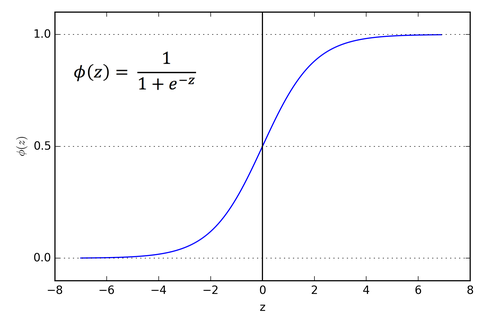
- Instead of simply using $\boxed{yi*w^T xi }$, we use $\boxed{\sigma(yi*w^T xi)= \frac{1}{1+exp(-yi*w^T xi)}}$

- Now our Optimization problem will look like...

- $\boxed{W^* = argmax_{w} \sum_{i=1}^n \frac{1}{1+exp(-yi*w^T xi)} }$

- For mathemetical convenience we use a monotonically increasing function <b>log</b>, Now the optimization problem will become...

- $\boxed{W^* = argmax_{w} \sum_{i=1}^n log(\frac{1}{1+exp(-yi*w^T xi)}) }$

- since $log(\frac{1}{x})=-log(x)$ we can write optimization problem as...

- $\boxed{W^* = argmax_{w} \sum_{i=1}^n -log(1+exp(-yi*w^T xi))}$

- We also know that max(f(x)) is same as min(-f(x)), now we can write optimization problem as...

- $\boxed{W^* = argmin_{w} \sum_{i=1}^n log(1+exp(-yi*w^T xi))}$

- We solve this optimization using Gradient Descent Algorithm. The Weight vector that we get will be the optimal W.

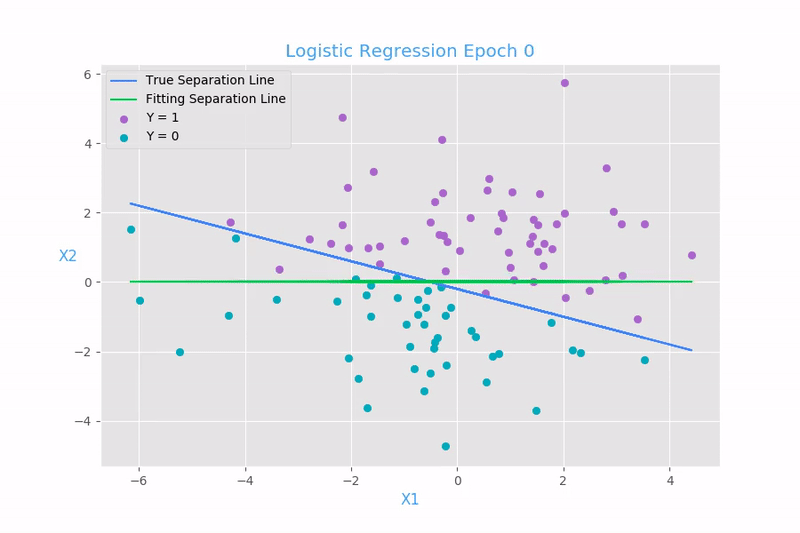

## Support Vector Machines(SVM)

- Support Vector Machines(SVM) are popular machine learning model used for classification as well as for regression.
- In this lecture, we will see SVM's for classification
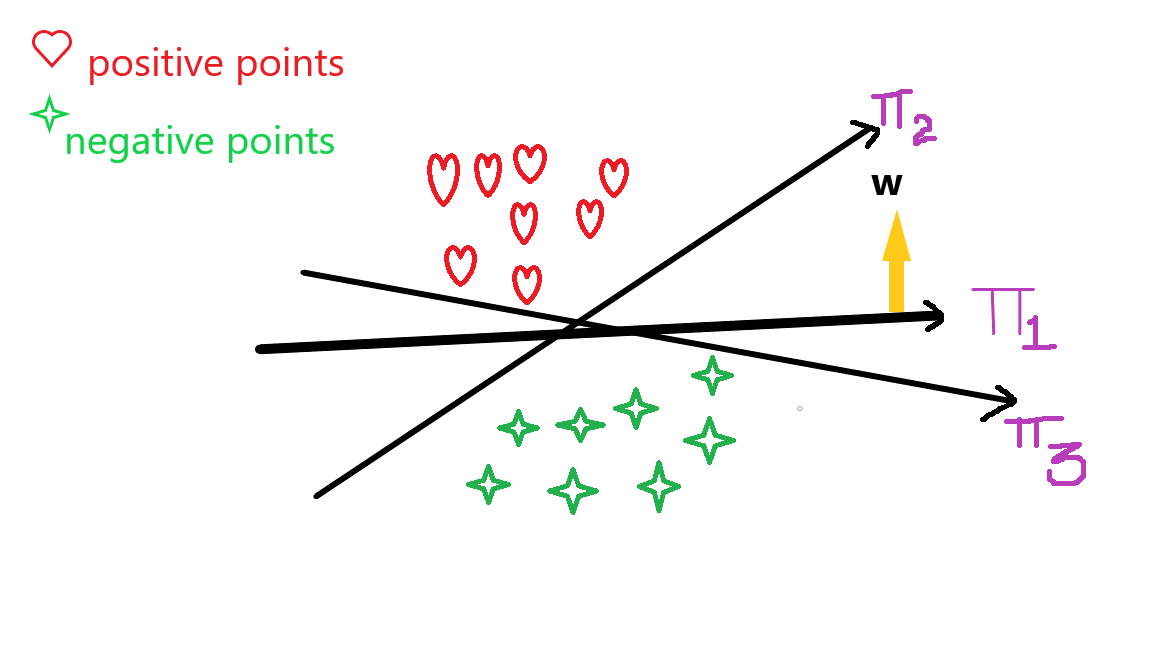
- In the above figure, To seperate positive points from negative points, there are many possible planes. Which is the best one?
- The key idea of SVM is to find a maximum margin hyperplane that separates positive points from negative points as widely as possible.
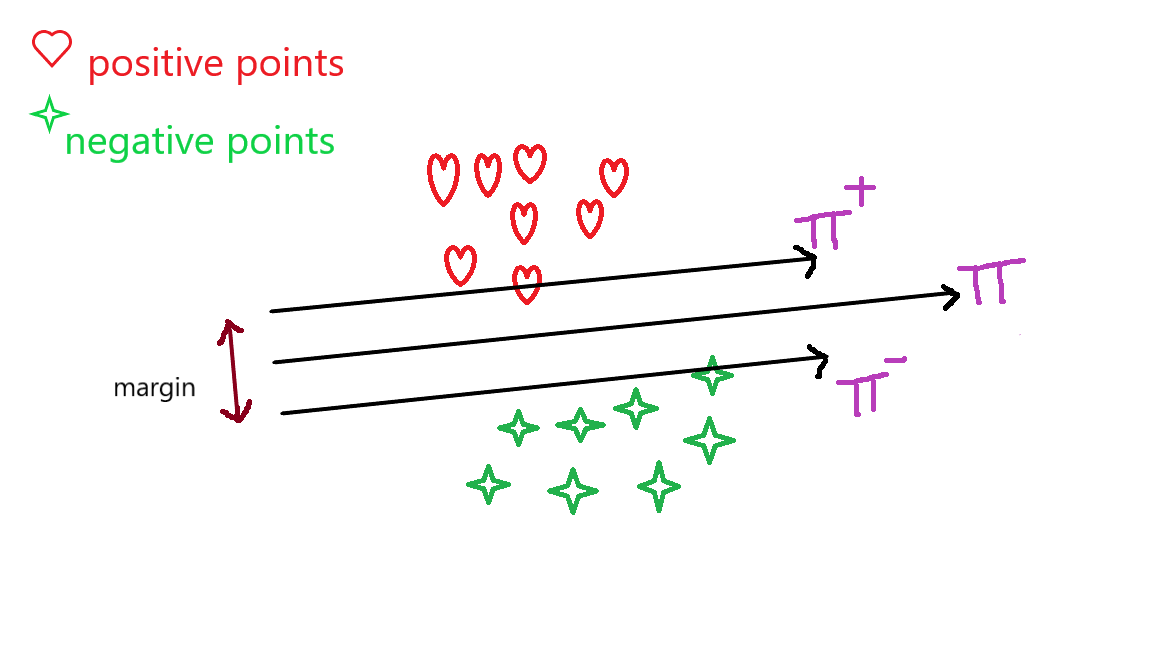
- Equation of plane $\pi$ is $w^T x +b=0$
- Equation of plane $\pi^+$ is $w^T x +b=+1$
- Equation of plane $\pi^-$ $w^T x +b=-1$
- For all the correctly classified points $\boxed{yi*w^T xi \ge1}$
- We define margin = distance($\pi^+$,$\pi^-$)= $\boxed{\frac{2}{||W||}}$
- Our objective is to findout a plane that maximizes this margin as widely as possible. i.e we need to find right w,b
- Now, the optimization problem will look like...
- $\boxed{(w^*,b^*)=argmax_{w,b}\frac{2}{||W||} = argmin_{w,b}\frac{||W||}{2}}$ such that $\forall x_{i}, y_{i}*(w^T x_{i}+b)\ge1$
- This is <b>hard margin SVM</b>. It works only when the data is perfectly linearly seperable.
- Let us consider a case where data is not perfectly linearly separable but almost linearly separable.
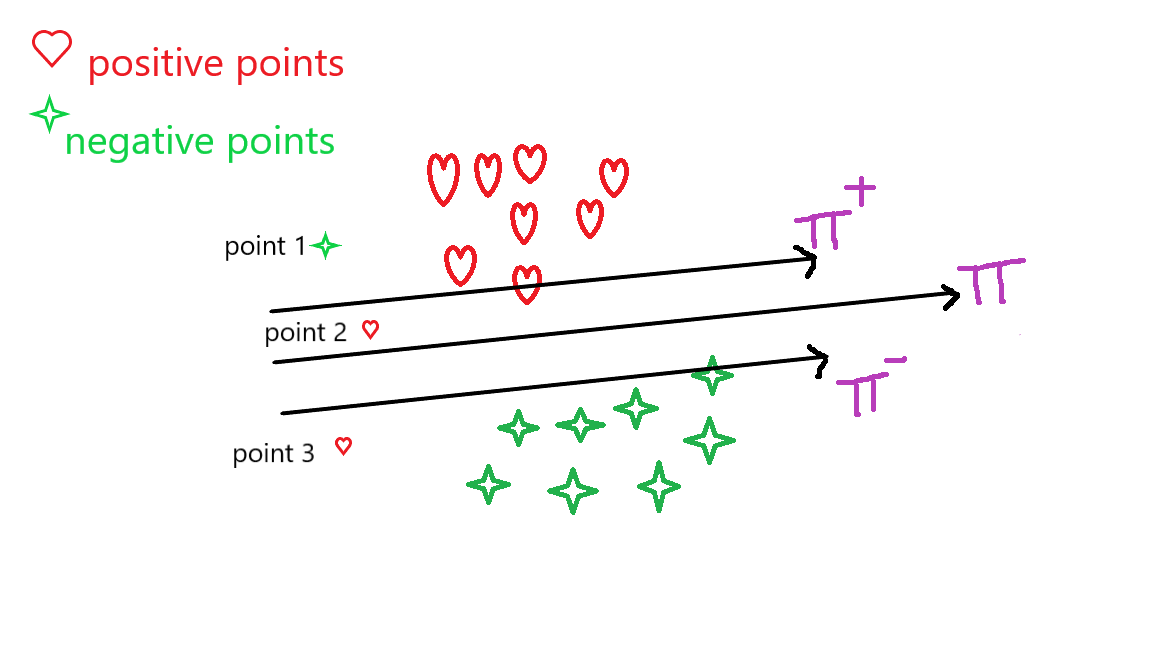
- for the above three points, to find $\boxed{(w^*,b^*)}$ using the constraint $\boxed{y_{i}*(w^T x_{i}+b)\ge1}$ is not at all possible.
- We need to modify our optimization problem.
- Let us introduce a variable $\zeta$(zeta) which is nothing but the Loss.
- It is the distance of the point from correct hyperplane in the incorrect direction.
- For all the correctly cassified points $\zeta_{i}=0$ 
- For incorrectly classfied points $\zeta_{i}\gt 0$ and equal to some units of distance away from the correct hyperplane in the incorrect direction.
- We can write $\boxed{\zeta_{i}=max(0,1-y_{i}*(w^T x_{i}+b))}$ 
- The final Optimization problem is...
    - $\boxed{(w^*,b^*)=argmin_{w,b}\frac{||W||}{2}+ c*\frac{1}{n}\sum_{i=1}^n\zeta_{i}}$ such that $\forall x_{i},  y_{i}*(w^T x_{i}+b)\ge1-\zeta_{i}$
    - here, c is the hyperparameter, we need to chosse right c to overcome overfitting/underfitting
- This is called <b>Soft Margin SVM</b> and we solve this optimization problem using Gradient Descent Algorithm

## Multi Layer Perceptron(MLP)

- In the previous lecture we have seen Perceptron and Linear Regression which are nothing but single neuron models.
- Now, we will see what is multi layer perceptron model and how to train the model?

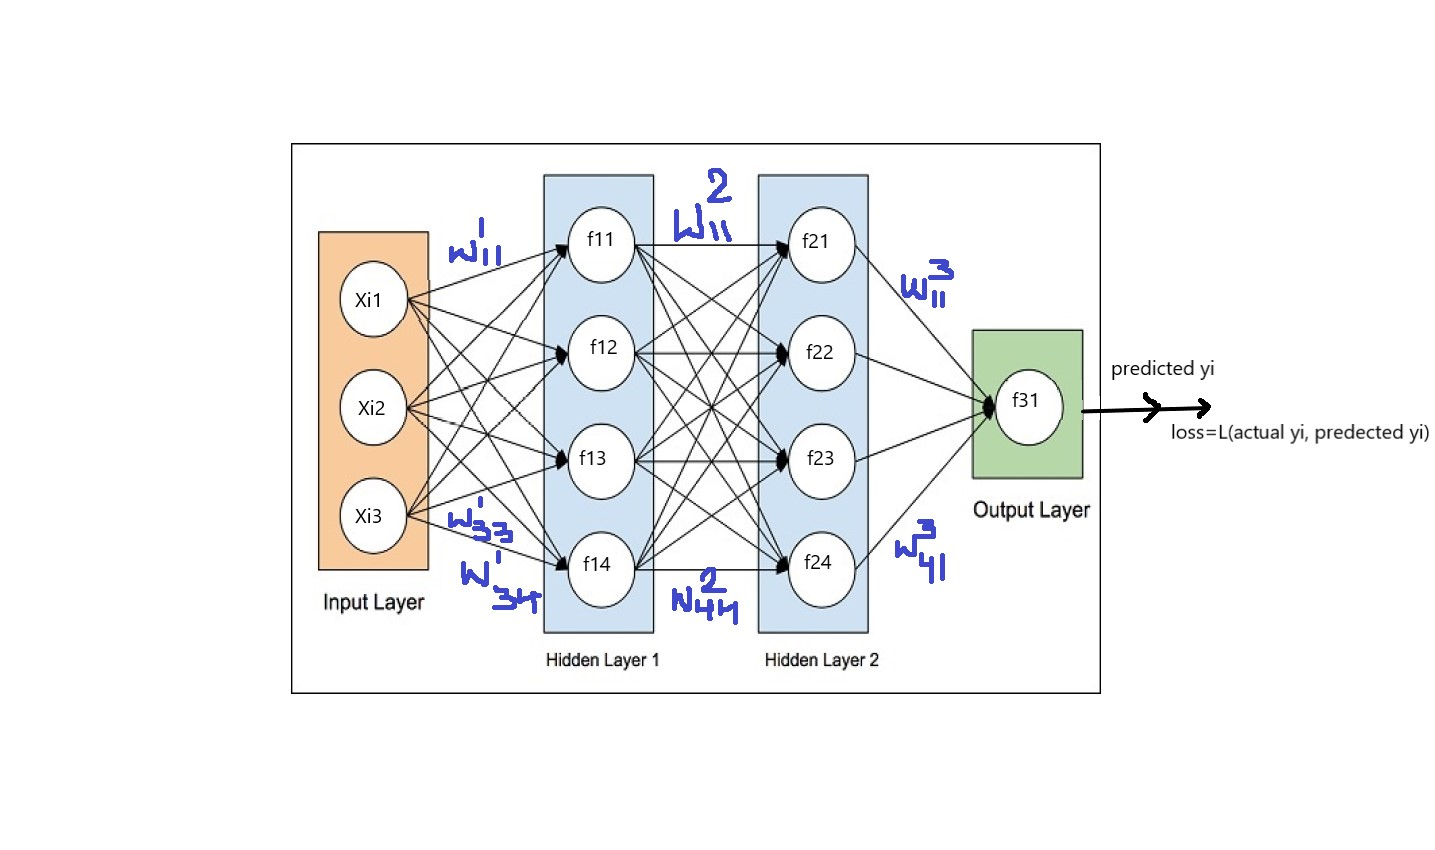
- As the name suggests, we can have more than 1 layer in between input layer and output layer.
- In the above figure, we have 1 input layer, 2 hidden layers and 1 output layer.
- Let us understand notations....
    - $f_{ij}$ means activation funtion 'j' corresponding to layer 'i'.
    - $w^k_{ij}$ means weight of the edge/connection from $i^{th}$ to the $j^{th}$ neuron and k represents the next layer.
    
### Training MLP 

- Let us take regression problem and see how to train MLP model.
- Given a dataset D={$x_{i},y_{i}$} here, $x_{i}\in R^3 and y_{i}\in R$
- Our objective is to find right set of weight vectors $W^1,W^2,W^3$
    - $W^1=[w^1_{11},w^1_{12}, w^1_{13},w^1_{14},w^1_{21},w^1_{22},w^1_{23},w^1_{24},w^1_{31},w^1_{32},w^1_{33},w^1_{34}]$
    
    - $W^2=[w^2_{11},w^2_{12}, w^2_{13},w^2_{14},w^2_{21},w^2_{22},w^2_{23},w^2_{24},w^2_{31},w^2_{32},w^2_{33},w^2_{34},w^2_{41},w^2_{42},w^2_{43},w^2_{44}]$
    - $W^3=[w^3_{11},w^3_{21},w^3_{31},w^3_{41}]$
- We will solve this using <b>Back Propagation Algorithm</b>
    - <b>step 1</b>: Initialize the weigths in each layer and chose activation functions
    - <b>step 2</b>: For each data point $x_{i}$ in D
        - a) Pass $x_{i}$ forward through the network---Forward Propagation
        - b) Compute loss L. For linear regression loss $L=\sum_{i=1}^n$(actual label-predicted label)$^2$
        - c) Compute the derivatives of loss function using chain rule
            - example:computing derivatives of loss with respect to $W^3=[w^3_{11},w^3_{21},w^3_{31},w^3_{41}]$
                - $\frac{dL}{dw^3_{11}}=\frac{dL}{df_{31}}*\frac{df_{31}}{dw^3_{11}}$
                - $\frac{dL}{dw^3_{21}}=\frac{dL}{df_{31}}*\frac{df_{31}}{dw^3_{21}}$
                - $\frac{dL}{dw^3_{31}}=\frac{dL}{df_{31}}*\frac{df_{31}}{dw^3_{31}}$
                - $\frac{dL}{dw^3_{41}}=\frac{dL}{df_{31}}*\frac{df_{31}}{dw^3_{41}}$
            - similarly we compute the derivatives of loss function with respect to $W^1,W^2$ using chain rule
            - Finally gradient of loss function $\nabla L$ contains derivatives of loss function with respect $W^1,W^2$,$W^3$
        - d) Update the weigths from end of the network using gradient descent by back propagating the error----Backward Propagation
            - Gradient Descent: $W_{new}= W_{old}-\eta*[\nabla L]_{W=W_{old}}$
    - <b>Step 3</b>: Repeat Step 2 till we reach convergence
    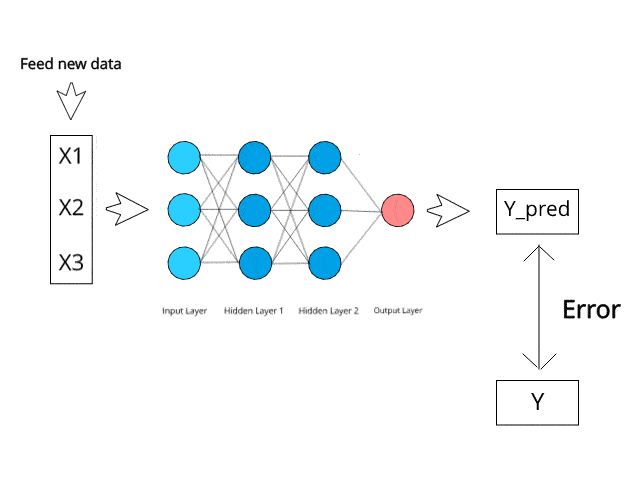

# Topics will be covered in the next lecture

* Deep Learning Frameworks
    - Pytorch
    - Tensorflow
    - Keras